# 1.Álgebra lineal

## Ejercicio: One-Hot Encoding para Categorías de Productos

El "one-hot encoding" (codificación one-hot) es una técnica común en aprendizaje automático y procesamiento de lenguaje natural para representar categorías o etiquetas categóricas como vectores binarios. Cada categoría se representa como un vector de dimensión igual al número total de categorías, con un valor de 1 en la posición correspondiente a la categoría y 0 en todas las demás posiciones. Aquí tienes un ejercicio que escenifica la aplicación del álgebra lineal sobre la técnica de "one-hot encoding":

Supongamos que tenemos un conjunto de datos de ventas en línea y queremos aplicar "One-Hot Encoding" para representar las categorías de productos en cada transacción.

In [ ]:
import numpy as np

# Lista de categorías de productos únicas en el conjunto de datos
categorias = ["Electrónica", "Ropa", "Hogar", "Deportes", "Alimentos", "Juguetes"]

# Conjunto de datos de ventas (cada fila representa una transacción)
ventas = [
    ["Ropa", "Hogar"],
    ["Electrónica", "Juguetes"],
    ["Alimentos", "Hogar"],
    ["Deportes", "Ropa"],
    ["Juguetes", "Hogar"]
]

# Inicializar una matriz de ceros para almacenar la codificación One-Hot de las transacciones
codificacion_one_hot = np.zeros((len(ventas), len(categorias)))

# Codificar las categorías de productos en las transacciones
for i, transaccion in enumerate(ventas):
    for categoria in transaccion:
        indice_categoria = categorias.index(categoria)
        codificacion_one_hot[i, indice_categoria] = 1

# Mostrar la matriz de codificación One-Hot
print("Matriz de Codificación One-Hot:")
print(codificacion_one_hot)


Matriz de Codificación One-Hot:
[[0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.]]


 ## Ejercicio: Tratamiento de imágenes
 Una representación numérica de una imagen a color se puede considerar un tensor tridimensional, donde cada dimensión representa una característica diferente de la imagen. Normalmente, se representa como una matriz tridimensional donde las dimensiones son altura, ancho y canales de color (generalmente rojo, verde y azul en una imagen RGB). Podemos realizar un ejercicio relacionado con la manipulación de tensores en el contexto de una imagen a color.

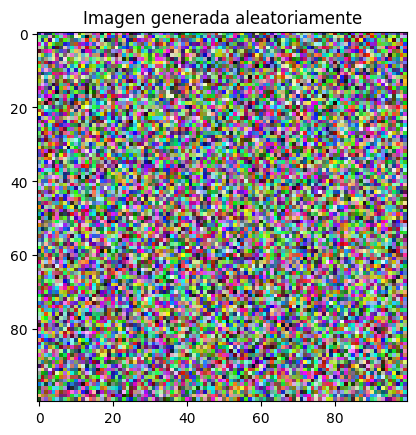

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Crear una imagen de ejemplo (tensor tridimensional)
imagen = np.random.randint(0, 256, size=(100, 100, 3))

# Mostrar la imagen
plt.imshow(imagen)
plt.title("Imagen generada aleatoriamente")
plt.show()

In [4]:
# Cargar una imagen desde el sistema de archivos (imagen de ejemplo)
imagen = np.array(Image.open('img.png'))

# Calcular el 5% del ancho y alto de la imagen
alto, ancho, _ = imagen.shape
margen_5_percent = int(0.05 * ancho)

# Definir las coordenadas del área a recortar con el margen 5%
x1, y1, x2, y2 = margen_5_percent, margen_5_percent, ancho - margen_5_percent, alto - margen_5_percent

# Realizar un recorte (cropping) de la imagen con el margen 5%
imagen_recortada = imagen[y1:y2, x1:x2]

# Mostrar la imagen original
plt.subplot(131)
plt.imshow(imagen)
plt.title("Imagen Original")
plt.axis("off")

# Mostrar la imagen recortada
plt.subplot(132)
plt.imshow(imagen_recortada)
plt.title("Imagen Recortada")
plt.axis("off")

# Aumentar el brillo en un 5%
aumento_brillo = 1.05  # Aumento del 5%
imagen_con_brillo = np.clip(imagen_recortada * aumento_brillo, 0, 255).astype(np.uint8)

# Mostrar la imagen con brillo aumentado
plt.subplot(133)
plt.imshow(imagen_con_brillo)
plt.title("Recortada más Brillo")
plt.axis("off")

# Mostrar las imágenes
plt.tight_layout()
plt.show()

# Calcular el promedio de intensidad de color en los canales R, G y B
promedio_canal_R = np.mean(imagen[:, :, 0])
promedio_canal_G = np.mean(imagen[:, :, 1])
promedio_canal_B = np.mean(imagen[:, :, 2])

print("Promedio del Canal Rojo:", promedio_canal_R)
print("Promedio del Canal Verde:", promedio_canal_G)
print("Promedio del Canal Azul:", promedio_canal_B)

FileNotFoundError: [Errno 2] No such file or directory: 'img.png'

## Ejercicio (extra al final): PCA iris
PCA es una técnica que utiliza álgebra lineal para reducir la dimensionalidad de un conjunto de datos manteniendo la mayor cantidad de información posible. En este ejemplo, utilizaremos PCA para reducir la dimensionalidad de un conjunto de datos de características.

Para realizar un ejercicio similar con datos reales, utilizaremos el conjunto de datos de flores Iris, que es un conjunto de datos ampliamente utilizado en machine learning. Este conjunto de datos contiene mediciones de características de tres especies diferentes de flores Iris.

En este ejercicio, aplicaremos el análisis de componentes principales (PCA) al conjunto de datos Iris para reducir su dimensionalidad y visualizar cómo se agrupan las diferentes especies de flores en un espacio bidimensional.

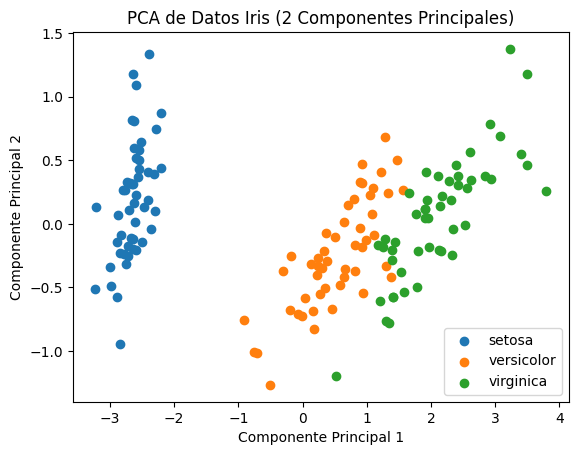

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(X)

# Visualizar los datos después de la reducción de dimensionalidad
for i, target_name in enumerate(iris.target_names):
    plt.scatter(componentes_principales[y == i, 0], componentes_principales[y == i, 1], label=target_name)

plt.title("PCA de Datos Iris (2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(loc='best')
plt.show()

In [ ]:
sum(pca.explained_variance_ratio_)

0.977685206318795

#2.Derivadas

## Ejercicio: Encontrar número de ventas de un producto que maximiza el beneficio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve

# Definimos la variable simbólica q (cantidad de unidades)
q = symbols('q')

# Definimos la función de costo total de producción C(q) = Costes fijos + Costes variables + Otros costos (almacenamiento, impuestos, seguros, etc.)
costo_total = 50 + 10*q + 10*q**2

# Definimos la función de ingresos totales R(q) = 150€ por unidad vendida
ingresos_totales = 150*q

# Calculamos la función de beneficios B(q) = R(q) - C(q)
beneficios = ingresos_totales - costo_total
print('Función de beneficios:')
beneficios

Función de beneficios:


-10*q**2 + 140*q - 50

El objetivo principal en este problema es encontrar la cantidad óptima de productos que se deben producir y vender para maximizar los beneficios.

La derivada es una herramienta matemática que nos ayuda a comprender cómo cambia una función en respuesta a cambios en su variable independiente. En este caso, la variable independiente es q (la cantidad de productos). La derivada de la función de beneficios nos proporciona información sobre cómo cambian los beneficios a medida que ajustamos la cantidad de productos vendidos.

In [ ]:
# Calculamos la derivada de B(q) con respecto a q
derivada_beneficios = diff(beneficios, q)
derivada_beneficios

140 - 20*q

Un punto crítico es un valor de q donde la derivada de la función de beneficios es igual a cero (derivada de B respecto a q = 0). En otras palabras, es un punto donde los beneficios dejan de aumentar o disminuir rápidamente. En este contexto, estamos buscando el punto donde los beneficios alcanzan su máximo o mínimo.

In [ ]:
# Calculamos el/los punto crítico (donde la derivada es igual a cero)
puntos_criticos = solve(derivada_beneficios, q)
print(puntos_criticos)

# Calculamos los beneficios en cada punto crítico
valores_beneficios = [beneficios.subs(q, punto) for punto in puntos_criticos]
print(valores_beneficios)

[7]
[440]


Queremos maximizar los beneficios, lo que significa encontrar la cantidad de productos que genera la ganancia más alta. Para hacerlo, buscamos el punto crítico donde la derivada es cero y luego verificamos si es un máximo (en lugar de un mínimo) para asegurarnos de que estamos obteniendo la máxima ganancia.

In [ ]:
# Encontramos el punto que maximiza los beneficios
indice_max_beneficios = np.argmax(valores_beneficios)
cantidad_optima = puntos_criticos[indice_max_beneficios]
max_beneficios = valores_beneficios[indice_max_beneficios]

In [ ]:
# Cantidad óptima de unidades y los beneficios máximos
print(f"La cantidad óptima de unidades para maximizar los beneficios es q = {cantidad_optima:.2f} unidades")
print(f"Los beneficios máximos son B(q) = {max_beneficios:.2f}")

La cantidad óptima de unidades para maximizar los beneficios es q = 7.00 unidades
Los beneficios máximos son B(q) = 440.00


Graficamos:

In [ ]:
# Creamos un rango de valores de q para graficar
q_valores = np.linspace(0, 10, 400)

# Calculamos los valores correspondientes de beneficios para el rango de q
beneficios_valores = [beneficios.subs(q, valor) for valor in q_valores]

# Calculamos la derivada de beneficios para el rango de q
derivada_beneficios_valores = [derivada_beneficios.subs(q, valor) for valor in q_valores]

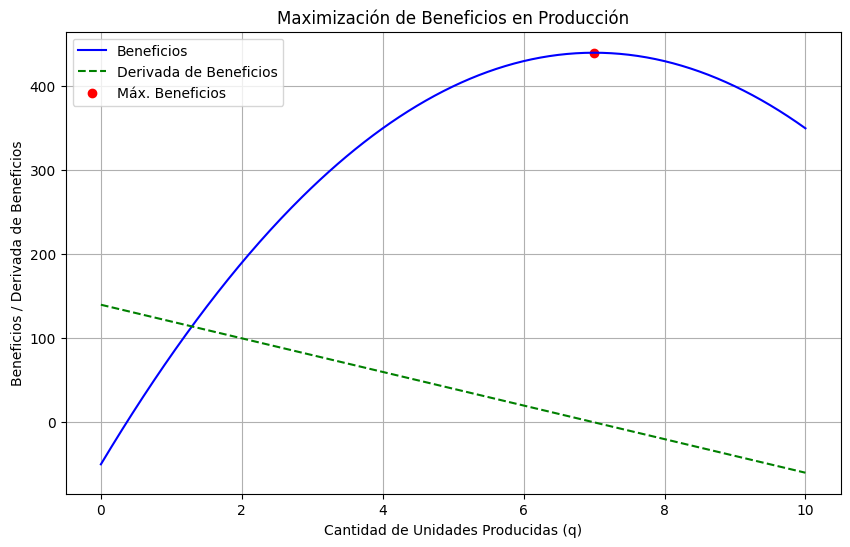

In [ ]:
# Crear el gráfico de beneficios en función de la cantidad de unidades producidas y su derivada
plt.figure(figsize=(10, 6))
plt.plot(q_valores, beneficios_valores, label='Beneficios', color='b')
plt.plot(q_valores, derivada_beneficios_valores, label='Derivada de Beneficios', color='g', linestyle='--')
plt.scatter(cantidad_optima, max_beneficios, color='r', label='Máx. Beneficios')
plt.title("Maximización de Beneficios en Producción")
plt.xlabel("Cantidad de Unidades Producidas (q)")
plt.ylabel("Beneficios / Derivada de Beneficios")
plt.grid(True)
plt.legend()
plt.show()

Y esto que acabamos de ver ¿qué tiene que ver con el Machine Learning?

En Machine Learning, cuando entrenamos un modelo, estamos en busca de las configuraciones internas, conocidas como parámetros, que minimizan los errores en nuestras predicciones. Puedes imaginar esto como sintonizar una radio para obtener la mejor calidad de sonido, ajustando las perillas hasta que la música suene sin interferencias. Para lograrlo, empleamos herramientas matemáticas, como cálculos de derivadas (gradientes) y algoritmos de optimización, que nos indican cómo y cuánto deben ajustarse esos parámetros. En resumen, se asemeja al proceso de encontrar la cantidad perfecta de productos para maximizar ganancias, pero aquí buscamos minimizar errores en lugar de maximizar beneficios.

#3.Integrales

## Ejercicio: Cálculo de Área usando Integrales

Situación: Quieres poner césped artificial para tu jardín así que necesitas calcular el área del mismo para saber cuánto comprar. A la hora de medir te das cuenta de que no es un simple rectángulo sino que su forma es irregular.

Decides dividir el jardín en pequeñas secciones, como triángulos y rectángulos. Cada sección tiene una forma simple, por lo que puedes calcular fácilmente su área utilizando fórmulas de geometría. Sin embargo, algunas partes de tu jardín tienen formas aún más irregulares, como curvas o áreas con bordes sinuosos. Calcular el área de estas secciones con fórmulas de geometría simple sería complicado. Aquí es donde entran las integrales.

La integral te permite calcular áreas bajo curvas o superficies irregulares dividiéndolas en segmentos más pequeños y sumando sus contribuciones infinitesimales. Es como si calcularas el área de tu jardín dividiéndolo en pedazos muy pequeños, calculando sus áreas individuales y sumándolas todas. Este proceso se llama "integral" y es una herramienta poderosa para resolver problemas de cálculo de áreas en formas irregulares.

<img src=https://static.wixstatic.com/media/8f76ac_3b8c7caafb1a41749d7794ade1f46652~mv2.jpg/v1/fill/w_1357,h_1018,al_c,q_90/8f76ac_3b8c7caafb1a41749d7794ade1f46652~mv2.webp>

In [ ]:
import numpy as np

# Definir la función f(x) que representa la curva irregular de la que hablamos
def f(x):
    return x**2

# Definir el intervalo [a, b] para representarla y el número de segmentos n para los cuales haremos las mediciones del área
a = 0
b = 2
n = 1000

# Calcular el ancho de cada segmento (a mayor n "número de muestras" mejor podremos definir el área total "más resolución")
dx = (b - a) / n
print(f'El ancho de cada segmento para un total de {n} segmentos en un intervalo de {a} a {b} debe ser de {dx}.')

El ancho de cada segmento para un total de 1000 segmentos en un intervalo de 0 a 2 debe ser de 0.002.


In [ ]:
# Inicializar el área aproximada
area_aproximada = 0

# Calcular el área aproximada utilizando la suma de Riemann
for i in range(n):
    x_i = a + i * dx  # Punto inicial de cada segmento 0, 0.002, 0.004,...
    x_mid = x_i + (dx/2)  # Punto medio de cada segmento para obtener la altura media de la sección 0.001, 0.003, 0.005
    area_aproximada += f(x_mid) * dx  # Área del rectángulo en el punto medio (base, que es dx por altura que es el valor de la función f(x) para cada uno de los puntos medios calculados)

# Imprimir el resultado del área aproximada
print("Área Aproximada:", area_aproximada)

Área Aproximada: 2.6666659999999993


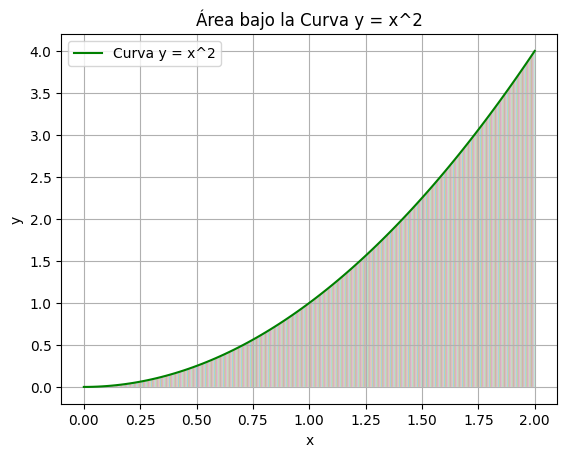

In [ ]:
import matplotlib.pyplot as plt

# Crear un rango de valores x para graficar la curva
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

# Crear una figura para visualizar la curva y los rectángulos
plt.plot(x_vals, y_vals, 'g', label='Curva y = x^2')

# Dibujar los rectángulos
for i in range(n):
    x_i = a + i * dx
    plt.fill_between([x_i, x_i + dx], [f(x_i), f(x_i + dx)], alpha=0.5)

# Configurar el gráfico
plt.title('Área bajo la Curva y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

(Posible opcional o más adelante)

Muy bien pero... ¿cómo se aplicaría el cálculo de una integral al mundo del ML?

Cálculo de la probabilidad de que un modelo pueda distinguir correctamente entre un correo electrónico spam y uno legítimo al azar:

El AUC (Área Bajo la Curva) de una curva ROC mide qué tan bueno es un modelo de clasificación sin entrar en detalles complicados. Puedes imaginarlo como la probabilidad de que el modelo pueda diferenciar correctamente entre correos electrónicos spam y legítimos. Un AUC de 0.5 significa que el modelo es tan bueno como una elección aleatoria, mientras que un AUC más cercano a 1 indica un mejor rendimiento en la clasificación. Es una forma sencilla de evaluar la efectividad de un modelo sin necesidad de comprender conceptos de clasificación más avanzados.

<img src=https://www.themachinelearners.com/wp-content/uploads/2020/12/roc-curve-v2.png>

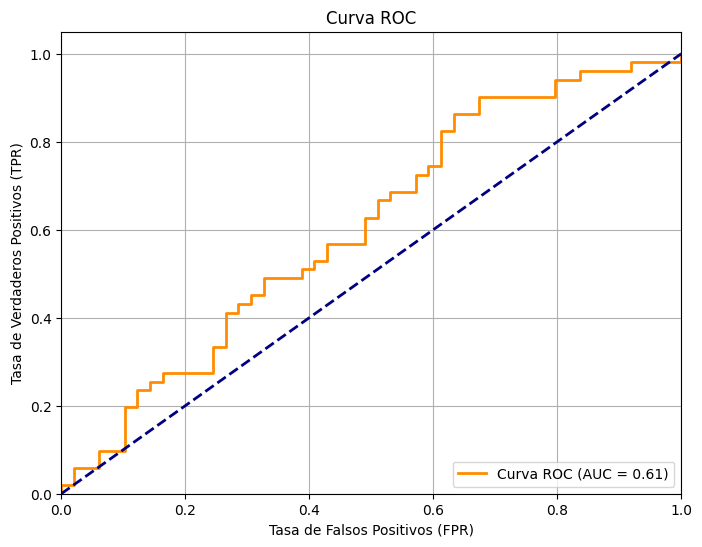

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Datos simulados de puntajes de clasificación y etiquetas verdaderas (0: negativo, 1: positivo)
np.random.seed(0)
puntajes = np.random.rand(100)
etiquetas = np.random.randint(2, size=100)

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(etiquetas, puntajes)
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
puntajes

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194,
       0.26455561, 0.77423369, 0.45615033, 0.56843395, 0.0187898 ,
       0.6176355 , 0.61209572, 0.616934  , 0.94374808, 0.6818203 ,
       0.3595079 , 0.43703195, 0.6976312 , 0.06022547, 0.66676672,
       0.67063787, 0.21038256, 0.1289263 , 0.31542835, 0.36371077,
       0.57019677, 0.43860151, 0.98837384, 0.10204481, 0.20887676,
       0.16130952, 0.65310833, 0.2532916 , 0.46631077, 0.24442559,
       0.15896958, 0.11037514, 0.65632959, 0.13818295, 0.19658236,
       0.36872517, 0.82099323, 0.09710128, 0.83794491, 0.09609841,
       0.97645947, 0.4686512 , 0.97676109, 0.60484552, 0.73926